In [1]:
import pandas as pd 
import seaborn as sns 


# Import file

In [2]:
udemy = pd.read_csv("D:/python/PANDAS/uDEMY_COURSES/udemy_courses.csv",parse_dates=['published_timestamp'])
udemy.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


# parse_dates=['published_timestamp'] change datetime column datatype

In [3]:
udemy.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [41]:
df1=udemy.copy()
df2=udemy.copy()

In [5]:
df1.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [7]:
df1.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# Missing or null value findings 

In [8]:
df1.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
null = df1.isnull().values.any()
print('Null value is prsent =', null)

Null value is prsent = False


<Axes: >

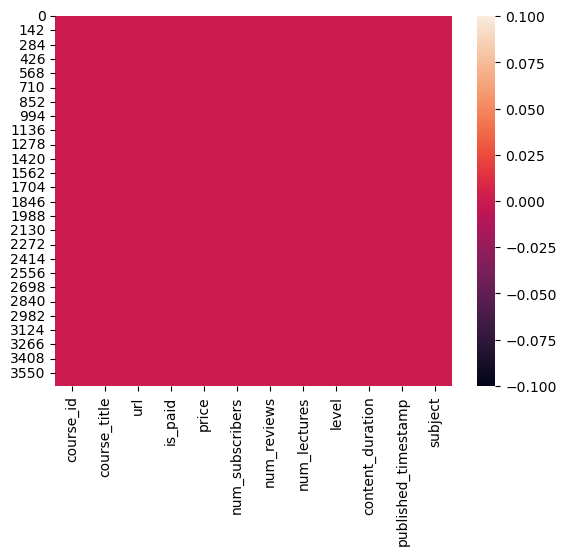

In [10]:
sns.heatmap(df1.isnull())

In [11]:
dup=df1.duplicated().any()
print('Duplicated values in dataset =', dup)

Duplicated values in dataset = True


In [12]:
## Drop duplicated values 
df1= df1.drop_duplicates()

In [13]:
dup=df1.duplicated().any()
print('Duplicated values in dataset =', dup)

Duplicated values in dataset = False


# Findout number of courses per subject 

In [14]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [15]:
df1['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [16]:
import matplotlib.pyplot as plt

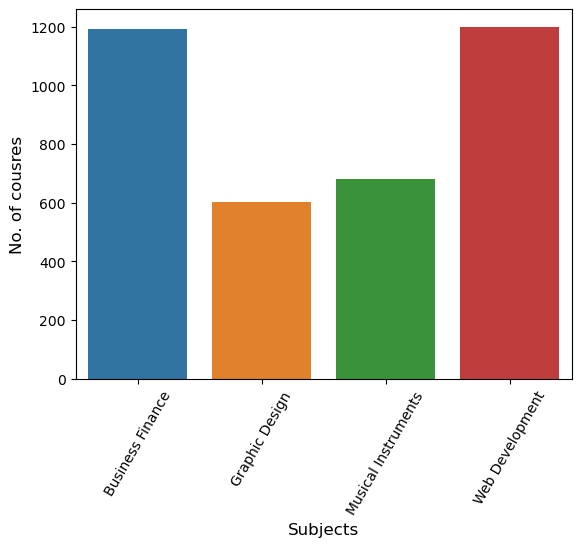

In [17]:

sns.countplot(x='subject', data=df1)
plt.xlabel('Subjects', fontsize = 12)
plt.ylabel('No. of cousres', fontsize = 12)
plt.xticks(rotation=60)
plt.show()

In [18]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [19]:
df1['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

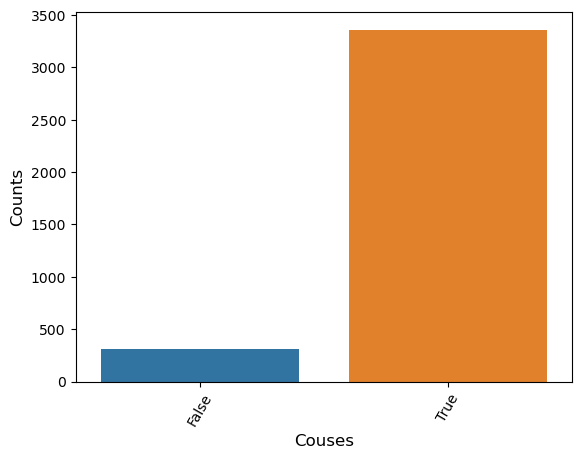

In [20]:
sns.countplot(x='is_paid', data=df1)
plt.xlabel('Couses', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.xticks(rotation=60)
plt.show()

# Which course has more lectures (Free or paid)

In [21]:
df1.columns


Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [22]:
df1.groupby('is_paid').mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_8592\3404493598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('is_paid').mean()


,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


# which course has a highest number od subcribers 

In [23]:
df1.groupby('is_paid')['num_subscribers'].max()

is_paid
False    268923
True     121584
Name: num_subscribers, dtype: int64

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

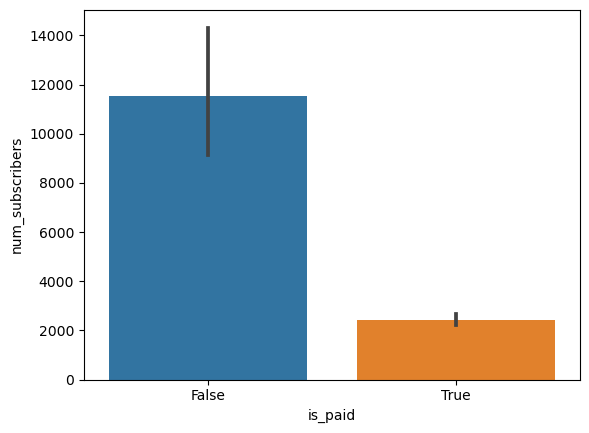

In [24]:
sns.barplot(x='is_paid', y='num_subscribers', data= df1)

# Which level has highest number of subcribers 

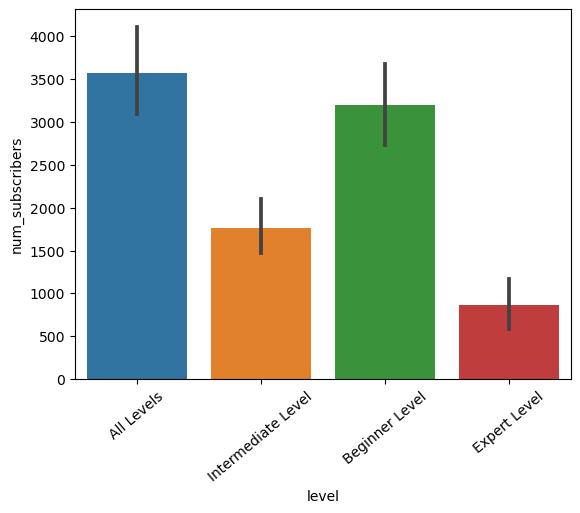

In [25]:
sns.barplot(x='level', y='num_subscribers', data= df1)
plt.xticks(rotation=40)
plt.show()

# Find most propular course title 

In [26]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [27]:
df1[df1['num_subscribers'].max()==df1['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# Top 10 propular courses according to subcribers


In [28]:
top_10=df1.sort_values(by='num_subscribers', ascending =False).head()

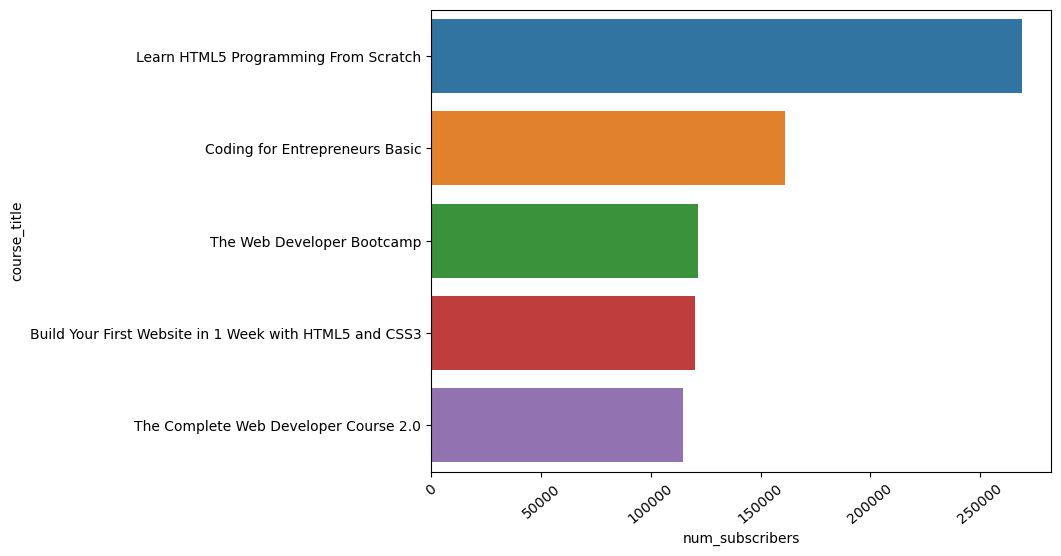

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='num_subscribers', y='course_title', data= top_10)

plt.xticks(rotation=40)
plt.show()

# Course has highest number of review 

In [30]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [31]:
df1.sort_values(by='num_reviews', ascending=False).head(1)['subject']

3230    Web Development
Name: subject, dtype: object

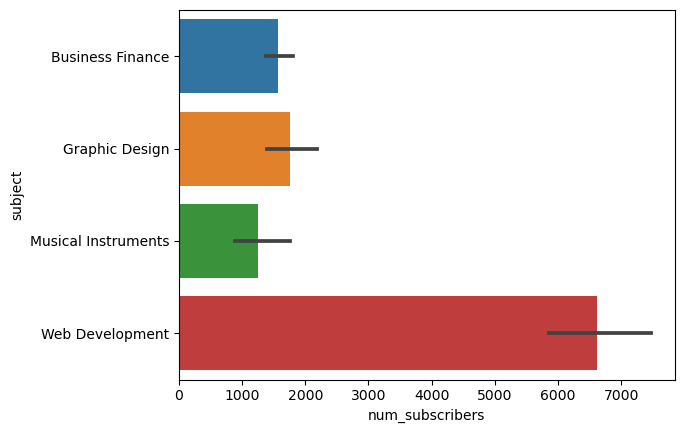

In [32]:
sns.barplot(x='num_subscribers', y='subject', data= df1)
plt.show()

# Price impact on Number of reviews

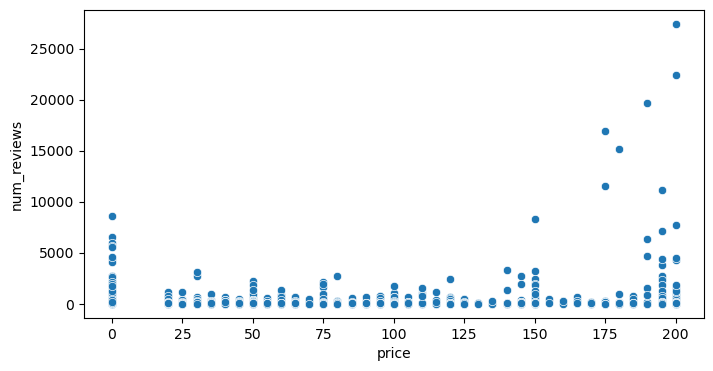

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='price', y= 'num_reviews', data=df1)
plt.show()

# Total number courses realted to python 

In [34]:
len(df1[df1['course_title'].str.contains('python', case = False)])

29

# Top 10 python cousre as number of subcribers 

In [35]:
top_10 =df1[df1['course_title'].str.contains('python', case = False)][['num_subscribers','course_title']].\
sort_values(by='num_subscribers',ascending=False).head(10)
top_10

,num_subscribers,course_title
2497,35267,Web Programming with Python
2570,23412,"Coding for Entrepreneurs: Learn Python, Django..."
2528,17714,Learn Python and Django: Payment Processing
3200,11832,Python and Django Full Stack Web Developer Boo...
3507,10917,Fun and creative web engineering with Python a...
2553,7827,The Complete Ethical Hacking Course 2.0: Pytho...
3138,7489,Complete Python Web Course: Build 8 Python Web...
3197,7407,Try Django 1.9 | Build a Blog and Learn Python...
2681,6153,Python for Beginners: Python Programming Langu...
3203,5151,REST APIs with Flask and Python


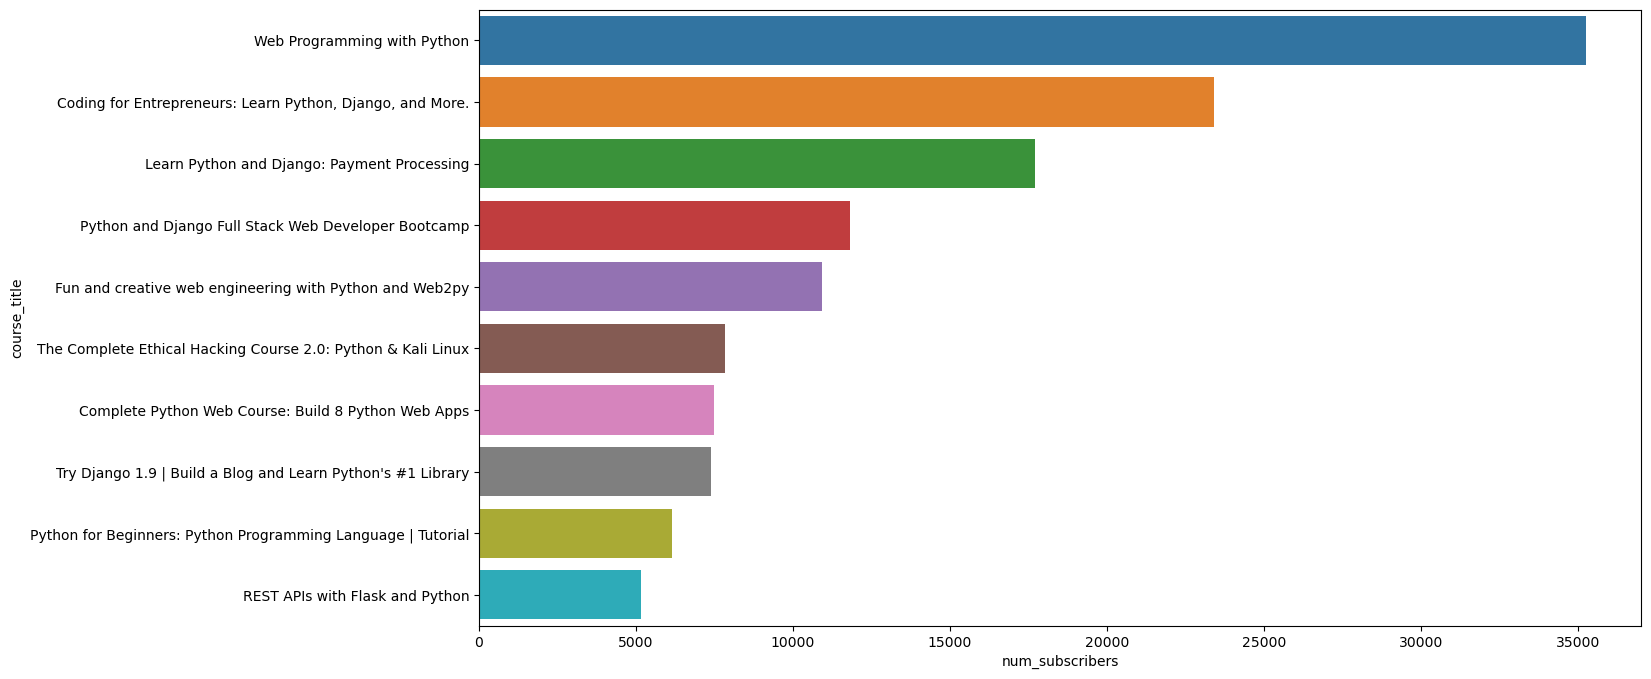

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(x='num_subscribers',y='course_title', data = top_10)
plt.show()

# In which year highest number of courses were posted

In [42]:
df2['year']=df2['published_timestamp'].dt.year

In [43]:
df2.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


In [44]:
df2['year'].value_counts()

2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: year, dtype: int64

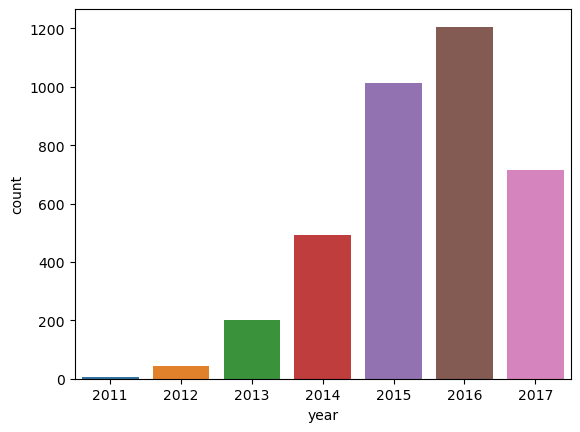

In [48]:
sns.countplot(x='year', data=df2)
plt.show()

# Display category wise count of posted subjects [Year Wise]

In [50]:
df2.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

In [53]:
df2.groupby('year')['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         56
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          66
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       349
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       225
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64